### Student Information
Name: 廖軒鴻

Student ID: 111164524

GitHub ID: ninjat6

Kaggle name: ninjat6

Kaggle private scoreboard snapshot:

[Snapshot](snapshot.png)
![Imgur](snapshot.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2022-Lab2-master Repo](https://github.com/keziatamus/DM2022-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm2022-isa5810-lab2-homework) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/2b0d14a829f340bc88d2660dc602d4bd. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Nov. 22th 11:59 pm, Tuesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 25th 11:59 pm, Friday)__. 

In [2]:
### Begin Assignment Here

# Data Mining Lab 2 HW

## Import Libraries

---
## 1. Data Preparation

## 1.1 Load data

In [3]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [4]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

#### pd.concat() 合併兩個以上的dataframe
預設為縱向合併

axis = 1 為橫向合併

In [5]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [6]:
test_df.head()

,id,text,emotion,intensity
0,10857,@ZubairSabirPTI pls dont insult the word 'Molna',anger,0.479
1,10858,@ArcticFantasy I would have almost took offens...,anger,0.458
2,10859,@IllinoisLoyalty that Rutgers game was an abom...,anger,0.562
3,10860,@CozanGaming that's what lisa asked before she...,anger,0.500
4,10861,Sometimes I get mad over something so minuscul...,anger,0.708


In [7]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [8]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


### Train data

In [9]:
train_df

,id,text,emotion,intensity
3496,40669,@BillSwindell @DePauwU @dick_nixon I was havin...,sadness,0.292
1590,20733,@ChrisWarcraft The concept that a gay magazine...,fear,0.417
409,10409,@RoyEnglish roy as fiery,anger,0.500
2143,30139,@JoshNoneYaBiz I love parody accounts! Well do...,joy,0.708
679,10679,and apparently he's supposed to have a Scottis...,anger,0.375
...,...,...,...,...
941,20084,"In #Bangladesh war, #US almost bombed us had #...",fear,0.812
864,20007,@laura221b I don't think I've ever moved so fa...,fear,0.938
454,10454,@LaraTheIrish &lt; feel everything. She would ...,anger,0.479
1969,21112,Study finds #awe &amp; #wonder of something gr...,fear,0.146


In [10]:
from sklearn.feature_extraction.text import CountVectorizer

train_count_vect = CountVectorizer()
train_counts = train_count_vect.fit_transform(train_df.text) #learn the vocabulary and return document-term matrix
print(train_counts[0])

  (0, 1112)	1
  (0, 2421)	1
  (0, 2490)	1
  (0, 9678)	1
  (0, 4014)	1
  (0, 1311)	1
  (0, 9782)	1
  (0, 7921)	1
  (0, 9020)	1
  (0, 1173)	1
  (0, 5957)	1
  (0, 1610)	1
  (0, 4383)	1
  (0, 8930)	1
  (0, 8142)	1


In [11]:
train_counts.shape

(3613, 10115)

In [12]:
train_count_vect.get_feature_names_out()

array(['00', '000', '00pm', ..., 'य_ब', 'सत', 'アニメ'], dtype=object)

In [13]:
import numpy as np

train_word_frequencies = []
for j in range(0,train_counts.shape[1]):
    train_word_frequencies.append(sum(train_counts[:,j].toarray()))
    
train_word_frequencies = np.asarray(train_counts.sum(axis=0))[0]

In [14]:
train_word_frequencies

array([2, 1, 1, ..., 2, 2, 1])

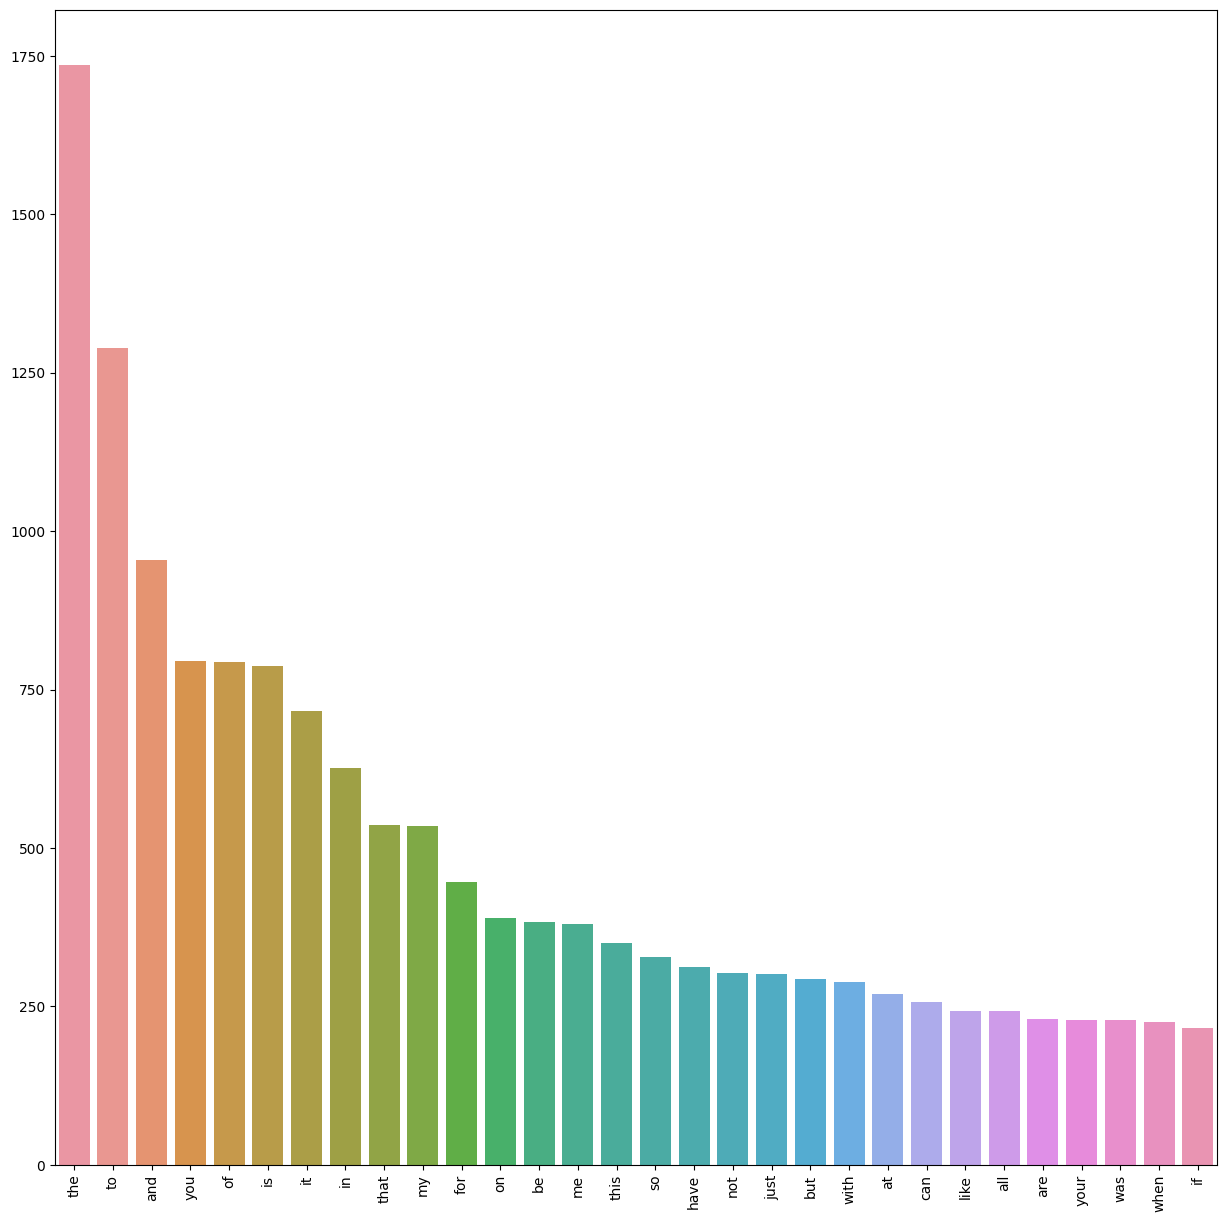

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

train_x_sort = train_count_vect.get_feature_names_out()
train_y_sort = train_word_frequencies

train_y_sort, train_x_sort = (list(i) for i in zip(*sorted(zip(train_y_sort, train_x_sort),reverse=True)))

#sns.set(font_scale=5)
plt.subplots(figsize=(15, 15))
g = sns.barplot(x=train_x_sort[:30], 
            y=train_y_sort[:30])
g.set_xticklabels(train_x_sort[:30], rotation = 90);

### Test data

In [16]:
test_df

,id,text,emotion,intensity
151,21214,I want to be a woman who #overcomes obstacles ...,fear,0.312
163,21226,@ChrissyCostanza and have social anxiety. Ther...,fear,0.771
307,40820,MC: what are you listen to these days?\nBogum:...,sadness,0.583
105,21168,@joey_coops yes Hun! Avoid at all costs!!,fear,0.389
270,30899,@GigaFag @pipertownsend_ snapchat new would be...,joy,0.396
...,...,...,...,...
182,21245,Hillary Clinton looked the other way to the Sa...,fear,0.479
45,10902,S/O to the girl that just hit my car...not onl...,anger,0.542
292,40805,Might go on @RadioX tomorrow to hopefully win ...,sadness,0.458
3,10860,@CozanGaming that's what lisa asked before she...,anger,0.500


In [17]:
test_count_vect = CountVectorizer()
test_counts = test_count_vect.fit_transform(test_df.text) #learn the vocabulary and return document-term matrix
print(test_counts[0])

  (0, 1837)	1
  (0, 1739)	1
  (0, 185)	1
  (0, 1898)	1
  (0, 1879)	1
  (0, 1278)	1
  (0, 1236)	1
  (0, 280)	1
  (0, 1660)	1
  (0, 1696)	2
  (0, 867)	2
  (0, 596)	1
  (0, 885)	1
  (0, 1240)	1
  (0, 1736)	1
  (0, 135)	1
  (0, 613)	1
  (0, 1428)	1
  (0, 1656)	1


In [18]:
test_counts.shape

(347, 1949)

In [19]:
test_count_vect.get_feature_names_out()

array(['10', '11', '11am', ..., 'zeroalcohol', 'zubairsabirpti', 'الخفجي'],
      dtype=object)

In [20]:
test_word_frequencies = []
for j in range(0,test_counts.shape[1]):
    test_word_frequencies.append(sum(test_counts[:,j].toarray()))
    
test_word_frequencies = np.asarray(test_counts.sum(axis=0))[0]

In [21]:
test_word_frequencies

array([1, 1, 2, ..., 1, 1, 1])

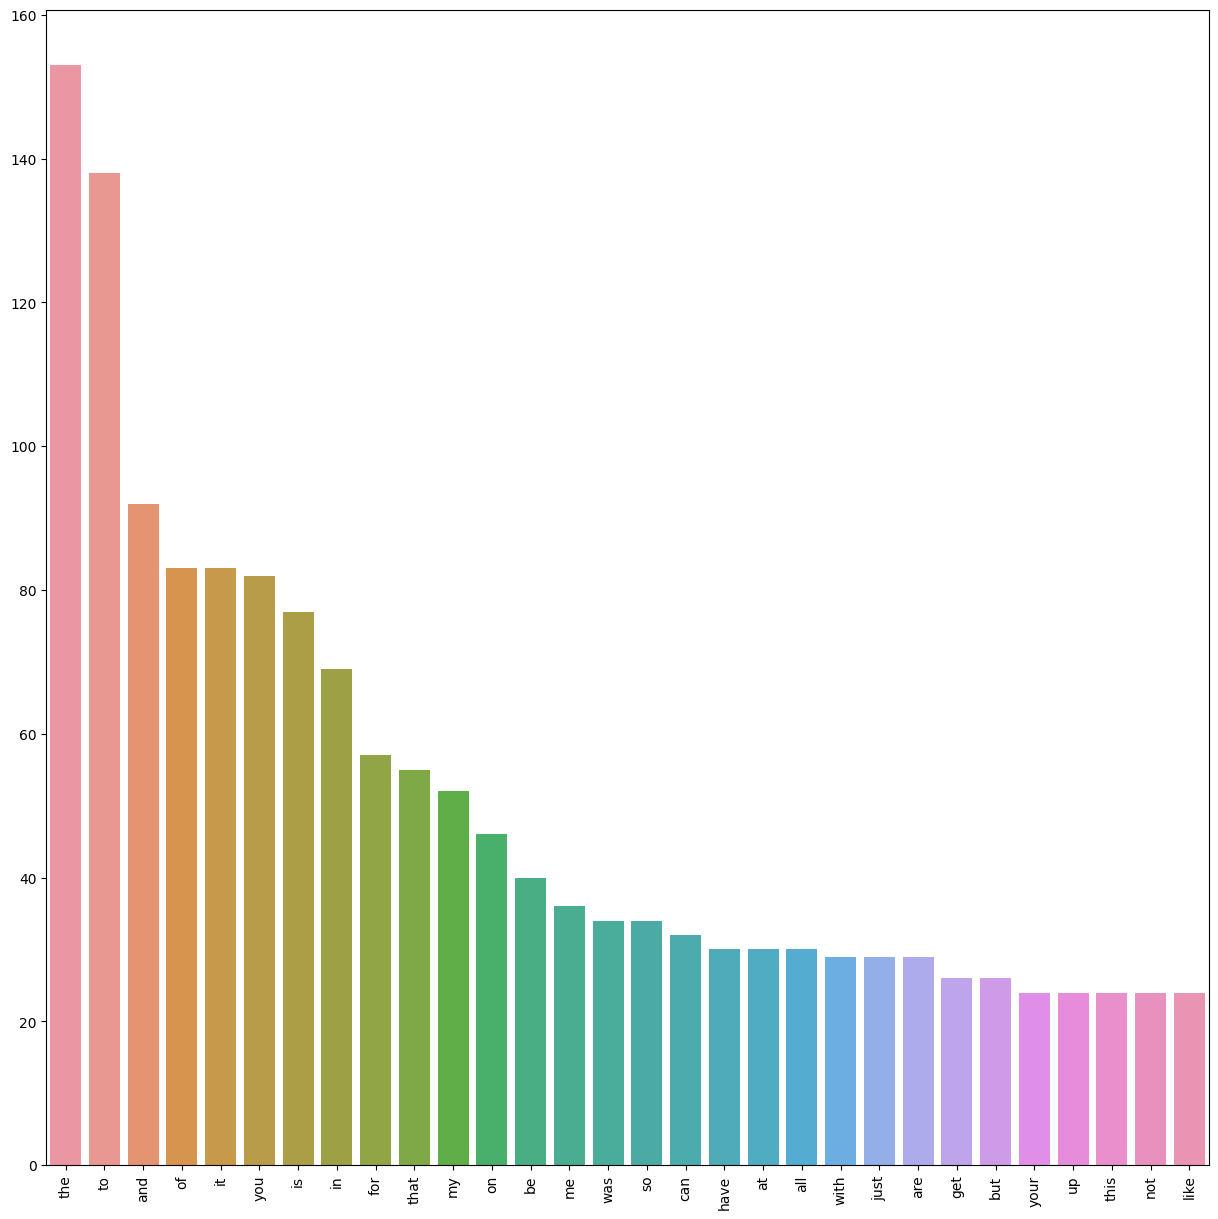

In [22]:
test_x_sort = test_count_vect.get_feature_names_out()
test_y_sort = test_word_frequencies

test_y_sort, test_x_sort = (list(i) for i in zip(*sorted(zip(test_y_sort, test_x_sort),reverse=True)))

#sns.set(font_scale=5)
plt.subplots(figsize=(15, 15))
g = sns.barplot(x=test_x_sort[:30], 
            y=test_y_sort[:30])
g.set_xticklabels(test_x_sort[:30], rotation = 90);

---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [23]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [24]:
## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [25]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

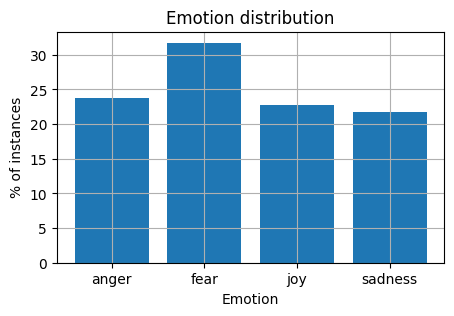

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---
## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [27]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer()

In [28]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [29]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [30]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [31]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [32]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [33]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [34]:
"😂" in feature_names

False

In [35]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

/Users/ninjat6/miniforge3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [36]:
train_data_BOW_features_500.toarray()

array([[3, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 5, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [37]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [38]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  

Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

# build analyzers (TF-IDF vectorizer)
vectorizer = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
train_data_TFIDF_features_1000 = vectorizer.fit_transform(train_df['text'])

train_data_TFIDF_features_1000.shape

(3613, 1000)

In [40]:
train_data_TFIDF_features_1000.toarray()

array([[0.47935262, 0.09890552, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.40753677, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.22168976, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [41]:
# observe some feature names
feature_names_1000 = vectorizer.get_feature_names_out()
feature_names_1000[100:110]

array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [46]:
# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [47]:
from sklearn.tree import DecisionTreeClassifier

## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'fear', 'sadness', 'joy', 'joy', 'sadness', 'fear', 'fear',
       'anger', 'fear'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [48]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.68


In [49]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [50]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [51]:
# Funciton for visualizing confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

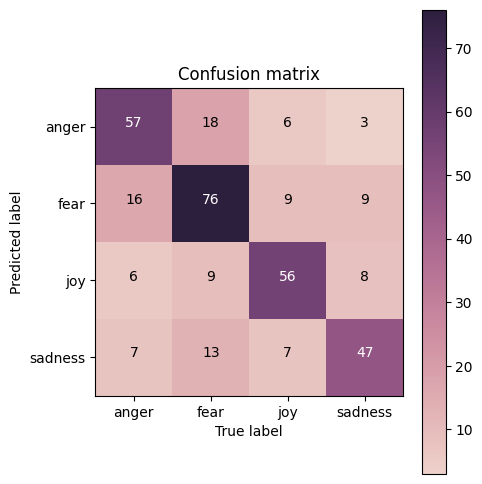

In [52]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

---
The above confusion matrix gives information about the true positives, true negatives, false positives and false negatives. For the x-axis is True label, means that the real answer of the data label, and the y-axis is the label which was predicted by the model. So we can see that for emotion 'anger' has 57 of the 84 ocurrences well predicted as anger, 18 were wrong predicted as fear and so on. And the color shows in the confusion matrix, is that the darker the more well-predict it is. 

---
define a function call plot_confusion_matrix()
The input parameters of the function respectively are:
1. cm : The confusion matrix you made.


2. classes(=my_tags) : This is the tags/labels of the confusion matrix, in this example is ['anger', 'fear', 'joy', 'sadness'].


3. title(='Confusion matrix') : This can help you add the title when plotting.


4. cmap(=sns.cubehelix_palette(as_cmap=True)) : This are a color map that can color the chart.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [54]:
from sklearn.naive_bayes import MultinomialNB

## build DecisionTree model
MNB_model = MultinomialNB()

## training!
MNB_model = MNB_model.fit(X_train, y_train)

## predict!
y_train_pred_E4 = MNB_model.predict(X_train)
y_test_pred_E4 = MNB_model.predict(X_test)

## so we get the pred result
y_test_pred_E4[:10]

array(['fear', 'sadness', 'sadness', 'fear', 'joy', 'sadness', 'anger',
       'joy', 'anger', 'anger'], dtype='<U7')

In [55]:
acc_train_E4 = accuracy_score(y_true=y_train, y_pred=y_train_pred_E4)
acc_test_E4 = accuracy_score(y_true=y_test, y_pred=y_test_pred_E4)

print('training accuracy: {}'.format(round(acc_train_E4, 2)))
print('testing accuracy: {}'.format(round(acc_test_E4, 2)))

training accuracy: 0.79
testing accuracy: 0.7


In [56]:
## precision, recall, f1-score
print(classification_report(y_true=y_test, y_pred=y_test_pred_E4))

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



In [57]:
## getting the confusion matrix
cm_E4 = confusion_matrix(y_true=y_test, y_pred=y_test_pred_E4) 
print(cm_E4)

[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


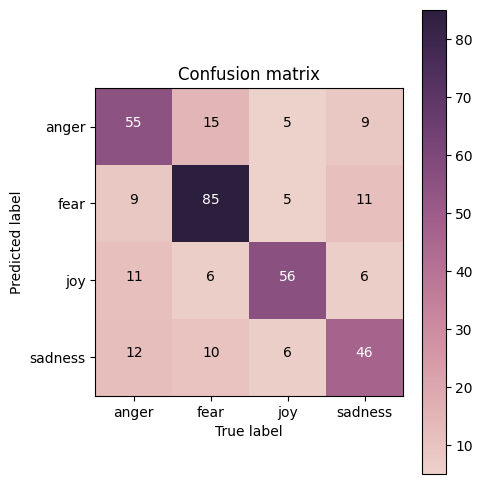

In [58]:
# plot the confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm_E4, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [61]:
print('Decision Tree model:')
print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))
print('\nNaive Bayes model:')
print('training accuracy: {}'.format(round(acc_train_E4, 2)))
print('testing accuracy: {}'.format(round(acc_test_E4, 2)))

Decision Tree model:
training accuracy: 0.99
testing accuracy: 0.68

Naive Bayes model:
training accuracy: 0.79
testing accuracy: 0.7


In the above we can see that the Decision Tree model's training accuracy is 0.99, which is more better than the Naive Bayes model. But for the testing accuracy, the Naive Bayes model is a little bit higher than the Decision Tree. For this result, the reason might be that Naive Bayes is probably the better choice when all features seem equally important, and it is not prone to overfitting.

---
## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## 6. Deep Learning

### 6.1 Prepare data (X, y)

In [129]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [130]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 163       anger
2148        joy
3339    sadness
2257        joy
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [131]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![Imgur](pics/pic2.png)

In [132]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense_3 (Dense)             (None, 64)                32064     
                                                                 
 re_lu_2 (ReLU)              (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_3 (ReLU)              (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 260       
                                                                 
 softmax_1 (Softmax)         (None, 4)                 0   

### 6.4 Train

In [133]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


2022-11-23 16:50:42.007661: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


113/113 [==============================] - ETA: 0s - loss: 1.3274 - accuracy: 0.3750

2022-11-23 16:50:46.345716: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


113/113 [==============================] - 5s 39ms/step - loss: 1.3274 - accuracy: 0.3750 - val_loss: 1.2941 - val_accuracy: 0.4524
Epoch 2/25
113/113 [==============================] - 3s 27ms/step - loss: 0.9922 - accuracy: 0.6347 - val_loss: 0.9122 - val_accuracy: 0.6542
Epoch 3/25
113/113 [==============================] - 3s 25ms/step - loss: 0.5852 - accuracy: 0.7927 - val_loss: 0.8407 - val_accuracy: 0.6801
Epoch 4/25
113/113 [==============================] - 3s 24ms/step - loss: 0.4196 - accuracy: 0.8475 - val_loss: 0.7853 - val_accuracy: 0.7032
Epoch 5/25
113/113 [==============================] - 3s 23ms/step - loss: 0.3335 - accuracy: 0.8813 - val_loss: 0.8200 - val_accuracy: 0.6916
Epoch 6/25
113/113 [==============================] - 3s 22ms/step - loss: 0.2659 - accuracy: 0.9109 - val_loss: 0.8658 - val_accuracy: 0.6744
Epoch 7/25
113/113 [==============================] - 3s 22ms/step - loss: 0.2277 - accuracy: 0.9233 - val_loss: 0.9486 - val_accuracy: 0.6772
Epoch 8/25

### 6.5 Predict on testing data

In [134]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 [==============================] - 0s 39ms/step


2022-11-23 16:51:57.400620: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[3.7812224e-05, 2.5060026e-05, 9.9923265e-01, 7.0454844e-04],
       [1.5297480e-01, 8.3459693e-01, 9.2333340e-04, 1.1504955e-02],
       [1.1938984e-07, 9.9999976e-01, 3.5391444e-08, 1.7722621e-07],
       [1.8426662e-03, 9.5353514e-01, 4.4497699e-03, 4.0172417e-02],
       [2.1649751e-06, 9.9999785e-01, 1.2182857e-12, 1.6276006e-09]],
      dtype=float32)

In [135]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['joy', 'fear', 'fear', 'fear', 'fear'], dtype=object)

In [136]:
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.69


In [137]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.375035,1.327374,0.452450,1.294113
1,1,0.634653,0.992162,0.654179,0.912156
2,2,0.792693,0.585182,0.680115,0.840740
3,3,0.847495,0.419617,0.703170,0.785281
4,4,0.881262,0.333482,0.691643,0.819962
5,5,0.910877,0.265853,0.674352,0.865839
6,6,0.923332,0.227733,0.677233,0.948634
7,7,0.939939,0.189604,0.685879,0.998909
8,8,0.950457,0.158372,0.665706,1.057582
9,9,0.957653,0.141094,0.668588,1.107401


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

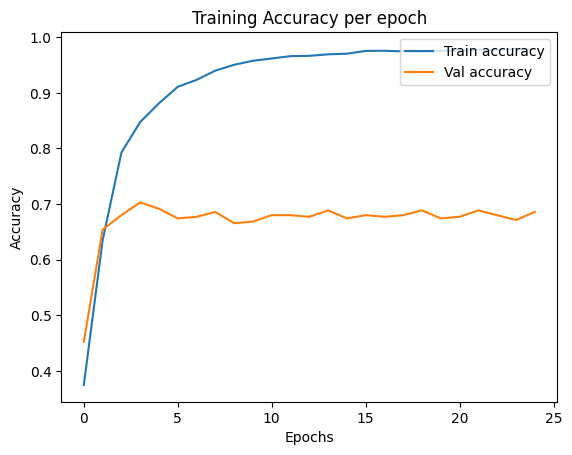

In [138]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy per epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train accuracy', 'Val accuracy'], loc='upper right')
plt.show()

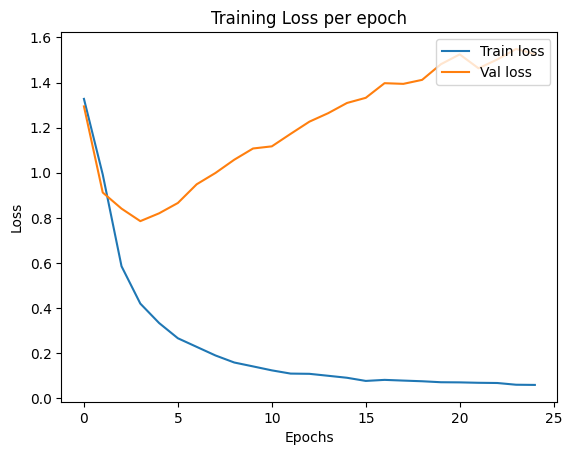

In [139]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss per epoch')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train loss', 'Val loss'], loc='upper right')
plt.show()

1. The training data loss was exponentially gets down per epoch, and so as the accuracy's rise. It is because for the  training data, the answer is already give to the model for training.
2. For the testing data, the model accuracy reaches a point where it cannot be more better, so performance stagnates at a certain percentage and then starts to drop when analyzing new data. And it might because of to many noisy data, so the model starts to overfitting, and even at some point the loss starts increasing instead of decreasing and keeps growing.

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [140]:
## check library
import gensim

## ignore warnings
import warnings

warnings.filterwarnings('ignore')

## if you want to see the training messages, you can use it
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
163,10163,Men in rage strike those that wish them best. ...,"[Men, in, rage, strike, those, that, wish, the..."
2148,30144,Riggs dumb ass hell lolol #hilarious #LethalWe...,"[Riggs, dumb, ass, hell, lolol, #, hilarious, ..."
3339,40512,"Sky news still pushing the Brexit gloom line, ...","[Sky, news, still, pushing, the, Brexit, gloom..."
2257,30253,@_stfukohle it's ok champ you'll make it I'm c...,"[@, _stfukohle, it, 's, ok, champ, you, 'll, m..."
3313,40486,@A_RockasThe U.S. has added years to the Syria...,"[@, A_RockasThe, U.S., has, added, years, to, ..."


In [141]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['Men', 'in', 'rage', 'strike', 'those', 'that', 'wish', 'them', 'best', '.', '#', 'rage', '#', 'emotions', '#', 'negative', '#', 'positive', '#', 'wish', '#', 'strike', '#', 'martial', '#', 'arts', '#', 'control', '#', 'believe', '#', 'best', '#', 'hope']),
       list(['Riggs', 'dumb', 'ass', 'hell', 'lolol', '#', 'hilarious', '#', 'LethalWeapon']),
       list(['Sky', 'news', 'still', 'pushing', 'the', 'Brexit', 'gloom', 'line', ',', 'managing', 'to', 'ignore', 'the', 'fact', 'it', "'s", 'simply', 'not', 'happening', '.', "'But", 'in', 'the', 'future', '.....', "'"])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [142]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

2022-11-23 16:51:58,029 : INFO : collecting all words and their counts
2022-11-23 16:51:58,029 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-11-23 16:51:58,037 : INFO : collected 11884 word types from a corpus of 72464 raw words and 3613 sentences
2022-11-23 16:51:58,038 : INFO : Creating a fresh vocabulary
2022-11-23 16:51:58,056 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 11884 unique words (100.00% of original 11884, drops 0)', 'datetime': '2022-11-23T16:51:58.056205', 'gensim': '4.2.0', 'python': '3.10.6 | packaged by conda-forge | (main, Aug 22 2022, 20:38:29) [Clang 13.0.1 ]', 'platform': 'macOS-12.6-arm64-arm-64bit', 'event': 'prepare_vocab'}
2022-11-23 16:51:58,056 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 72464 word corpus (100.00% of original 72464, drops 0)', 'datetime': '2022-11-23T16:51:58.056691', 'gensim': '4.2.0', 'python': '3.10.6 | packaged by conda-forge | (main, Aug 22 2022,

### 7.3 Generating word vector (embeddings)

In [143]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 6.46728516e-01,  1.32183939e-01, -9.52113271e-02, -1.96165115e-01,
        1.24974281e-01, -5.18017232e-01,  2.68239737e-01,  1.21711874e+00,
       -3.84881318e-01, -3.22765052e-01, -5.17931402e-01, -3.24931800e-01,
       -3.66149008e-01, -2.33228616e-02, -2.64198240e-02, -3.28809232e-01,
        4.72676665e-01, -5.17257273e-01,  4.11340803e-01, -1.08569276e+00,
        8.96400630e-01,  8.27302158e-01,  3.92896444e-01, -2.74807811e-01,
        3.62496495e-01, -7.83180743e-02, -8.82995009e-01,  9.33616906e-02,
       -6.01638079e-01,  2.01177988e-02,  2.16099173e-01,  1.32612541e-01,
        7.29028702e-01, -8.35795105e-01,  1.42899081e-01,  7.54384935e-01,
        1.02947676e-03, -1.80342756e-02, -8.07831705e-01, -3.11262399e-01,
        6.71500713e-02, -1.06880538e-01, -7.60674328e-02,  2.00907841e-01,
        4.77362901e-01, -4.48753506e-01, -7.23275125e-01,  5.12050271e-01,
        5.82572401e-01,  2.03291953e-01, -9.29427296e-02, -3.53249311e-01,
       -1.79183006e-01,  

In [144]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('Be', 0.9369842410087585),
 ('🕋', 0.9293997287750244),
 ('register', 0.9203024506568909),
 ('smile', 0.9131147861480713),
 ('birthday', 0.9065281748771667),
 ('blessed', 0.9050589203834534),
 ('establishment', 0.9024179577827454),
 ('melancholic', 0.899086594581604),
 ('help', 0.8988584876060486),
 ('successful', 0.8975204825401306)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:

In [145]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

2022-11-23 16:51:58,770 : INFO : loading projection weights from GoogleNews/GoogleNews-vectors-negative300.bin.gz
2022-11-23 16:52:22,544 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (3000000, 300) matrix of type float32 from GoogleNews/GoogleNews-vectors-negative300.bin.gz', 'binary': True, 'encoding': 'utf8', 'datetime': '2022-11-23T16:52:22.543632', 'gensim': '4.2.0', 'python': '3.10.6 | packaged by conda-forge | (main, Aug 22 2022, 20:38:29) [Clang 13.0.1 ]', 'platform': 'macOS-12.6-arm64-arm-64bit', 'event': 'load_word2vec_format'}


load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [146]:
import gensim.downloader as api

import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

2022-11-23 16:53:09,533 : INFO : loading projection weights from /Users/ninjat6/gensim-data/glove-twitter-25/glove-twitter-25.gz
2022-11-23 16:53:21,951 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (1193514, 25) matrix of type float32 from /Users/ninjat6/gensim-data/glove-twitter-25/glove-twitter-25.gz', 'binary': False, 'encoding': 'utf8', 'datetime': '2022-11-23T16:53:21.951117', 'gensim': '4.2.0', 'python': '3.10.6 | packaged by conda-forge | (main, Aug 22 2022, 20:38:29) [Clang 13.0.1 ]', 'platform': 'macOS-12.6-arm64-arm-64bit', 'event': 'load_word2vec_format'}


load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.9336148500442505),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158350825309753),
 ('thanks', 0.9150084853172302),
 ('merry', 0.9053248763084412),
 ('bless', 0.902732253074646),
 ('wish', 0.9013165235519409)]

### 7.5 king + woman - man = ?
Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [147]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


### answer:
#### There are differet methods to get the sentence vectors :

1. Doc2Vec : you can train your dataset using Doc2Vec and then use the sentence vectors.


2. Average of Word2Vec vectors : You can just take the average of all the word vectors in a sentence. This average vector will represent your sentence vector.


3. Average of Word2Vec vectors with TF-IDF : this is one of the best approach which I will recommend. Just take the word vectors and multiply it with their TF-IDF scores. Just take the average and it will represent your sentence vector.

---
### 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [148]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [149]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


![Imgur](pics/pic6.png)

In [150]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)

In [151]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)


## 9. High-dimension Visualization: t-SNE

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below:

![Image](pics/pic7.png)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

Here we would like to introduce another visualization method called t-SNE.  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 

### 9.1 Prepare visualizing target
Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [152]:
word_list = ['happy', 'angry', 'data', 'mining']
topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.2 Plot using t-SNE (2-dimension)

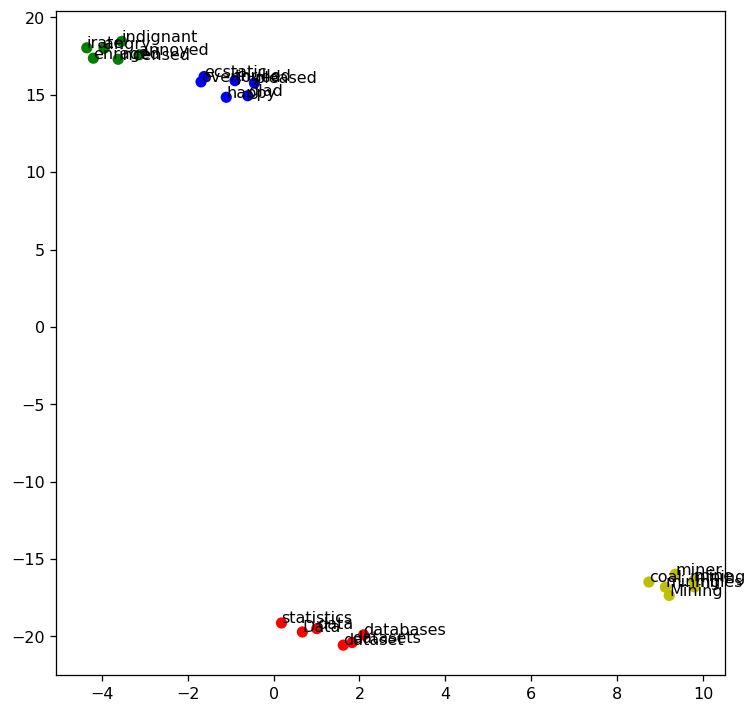

In [153]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)
# n_components: 要降成多少維

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

Prepare the data lists :
- angry words
- happy words
- sad words
- fear words

> E8 = Exercise 8

In [154]:
word_list_E8 = ['angry', 'happy', 'sad', 'fear']

# Add 14 words most related words
topn_E8 = 14

angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn_E8)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn_E8)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn_E8)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn_E8)]        

print('angry_words: ', angry_words,'\n')
print('happy_words: ', happy_words,'\n')
print('sad_words: ', sad_words,'\n')
print('fear_words: ', fear_words,'\n')

target_words_E8 = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words_E8)

print('\ncolor list:')
cn_E8 = topn_E8 + 1
color_E8 = ['b'] * cn_E8 + ['g'] * cn_E8 + ['r'] * cn_E8 + ['y'] * cn_E8
print(color_E8)

angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier'] 

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful'] 

sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry'] 

fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried'] 


target words: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'happy', 'glad

In [155]:
print('Total words:', len(target_words_E8))

Total words: 60


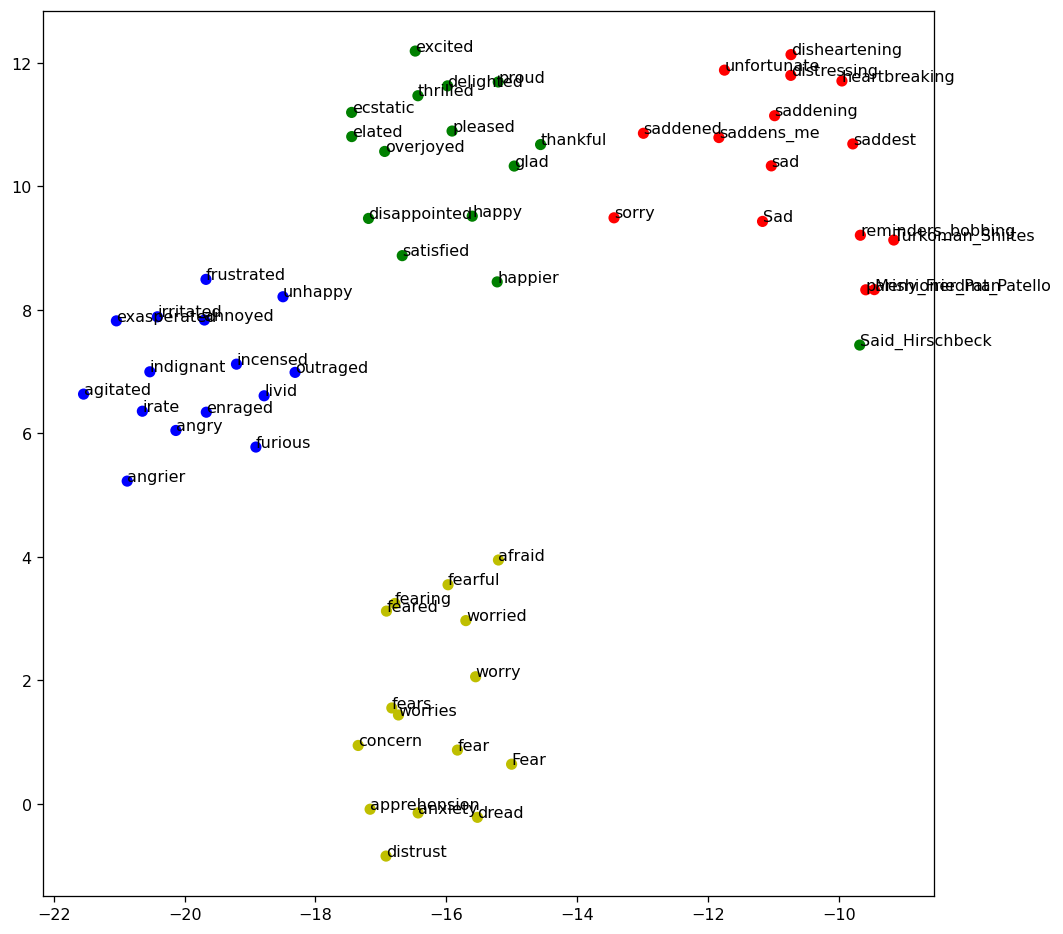

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## w2v model
model_E8 = w2v_google_model

## prepare training word vectors
size_E8 = 200
target_size_E8 = len(target_words_E8)
all_word_E8 = list(model.index_to_key)
word_train_E8 = target_words_E8 + all_word_E8[:size_E8]
X_train_E8 = model_E8[word_train_E8]

## t-SNE model
tsne_E8 = TSNE(n_components=2, metric='cosine', random_state=19)
# n_components: 要降成多少維

## training
X_tsne_E8 = tsne_E8.fit_transform(X_train_E8)

## plot the result
plt.figure(figsize=(10, 10), dpi=115)
plt.scatter(X_tsne_E8[:target_size_E8, 0], X_tsne_E8[:target_size_E8, 1], c=color_E8)
for label, x, y in zip(target_words_E8, X_tsne_E8[:target_size_E8, 0], X_tsne_E8[:target_size_E8, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
# Kaggle competition

In this competition, we provide a dataset which was crawled from Twitter, and we have already labeled the emotion for these tweets by some specific hashtags in the original text. There are 8 classes (or say emotions) in our dataset: anger, anticipation, disgust, fear, sadness, surprise, trust, and joy.

You have to clean the data by doing some pre-processing first. Then, apply feature engineering or any other data mining technique you have or haven't learned in the Data Mining course. The final goal is to learn a model that is able to predict the emotion behind each tweet.

---
# Data Preparation

## Load data

#### 1. emotion.csv - 
Lists the emotion labels per tweet_id

In [2]:
import pandas as pd
emotion_df = pd.read_csv("emotion.csv")
emotion_df['emotion'].unique()

array(['sadness', 'disgust', 'anticipation', 'joy', 'trust', 'anger',
       'fear', 'surprise'], dtype=object)

In [3]:
emotion_df

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation
...,...,...
1455558,0x38dba0,joy
1455559,0x300ea2,joy
1455560,0x360b99,fear
1455561,0x22eecf,joy


In [4]:
# group to find distribution
emotion_df.groupby(['emotion']).count()['tweet_id']

emotion
anger            39867
anticipation    248935
disgust         139101
fear             63999
joy             516017
sadness         193437
surprise         48729
trust           205478
Name: tweet_id, dtype: int64

##### Here we can see the distribution of every emotion in the data

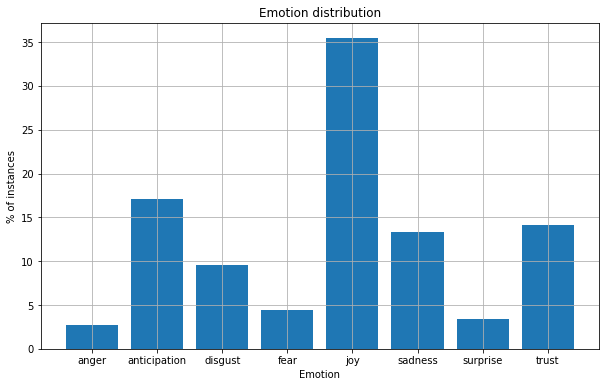

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = emotion_df['emotion'].unique()
post_total = len(emotion_df)
df1 = emotion_df.groupby(['emotion']).count()['tweet_id']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(10,6))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

We can see the 'joy' is the most. And after testing the baseline with all 'joy' label in the submission, the score is 0.30764. 

In [6]:
submission_df = pd.read_csv("sampleSubmission.csv")
submission_df

,id,emotion
0,0x2c7743,surprise
1,0x2c1eed,surprise
2,0x2826ea,surprise
3,0x356d9a,surprise
4,0x20fd95,surprise
...,...,...
411967,0x351857,surprise
411968,0x2c028e,surprise
411969,0x1f2430,surprise
411970,0x2be24e,surprise


In [7]:
submission_df['emotion'][:] = 'joy'

In [8]:
answer = submission_df
answer

,id,emotion
0,0x2c7743,joy
1,0x2c1eed,joy
2,0x2826ea,joy
3,0x356d9a,joy
4,0x20fd95,joy
...,...,...
411967,0x351857,joy
411968,0x2c028e,joy
411969,0x1f2430,joy
411970,0x2be24e,joy


---
#### 2. tweets_DM.json - 
Raw data from Twitter

In [9]:
df = pd.read_json('tweets_DM.json', lines=True)
df

,_score,_index,_source,_crawldate,_type
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets
...,...,...,...,...,...
1867530,827,hashtag_tweets,"{'tweet': {'hashtags': ['mixedfeeling', 'butim...",2015-05-12 12:51:52,tweets
1867531,368,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x29d0...",2017-10-02 17:54:04,tweets
1867532,498,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2a6a...",2016-10-10 11:04:32,tweets
1867533,840,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x24fa...",2016-09-02 14:25:06,tweets


In [10]:
source = df['_source']
source

0          {'tweet': {'hashtags': ['Snapchat'], 'tweet_id...
1          {'tweet': {'hashtags': ['freepress', 'TrumpLeg...
2          {'tweet': {'hashtags': ['bibleverse'], 'tweet_...
3          {'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...
4          {'tweet': {'hashtags': [], 'tweet_id': '0x2de2...
                                 ...                        
1867530    {'tweet': {'hashtags': ['mixedfeeling', 'butim...
1867531    {'tweet': {'hashtags': [], 'tweet_id': '0x29d0...
1867532    {'tweet': {'hashtags': [], 'tweet_id': '0x2a6a...
1867533    {'tweet': {'hashtags': [], 'tweet_id': '0x24fa...
1867534    {'tweet': {'hashtags': ['Sundayvibes'], 'tweet...
Name: _source, Length: 1867535, dtype: object

In [11]:
import json

jsonFile = open("data.json", "w")
for i in range(source.count()):
    j = source[i]['tweet']
    js = json.dumps(j) 
    jsonFile.write(js)
    jsonFile.write('\n')
    
jsonFile.close()

In [12]:
jdf = pd.read_json('data.json', lines=True)
jdf

,hashtags,tweet_id,text
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,[],0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...,...
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...
1867532,[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,[],0x24faed,"Ah, corporate life, where you can date <LH> us..."


---
#### 3. data_identification.csv - 
A file that identifies membership of training or testing set per tweet_id. Note that you won´t be provided with the labels for the testing set, but you will have to predict for these when you make your submission.

In [13]:
identification_df = pd.read_csv("data_identification.csv")
identification_df

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train
...,...,...
1867530,0x227e25,train
1867531,0x293813,train
1867532,0x1e1a7e,train
1867533,0x2156a5,train


In [14]:
identification_df['identification']

0           test
1          train
2          train
3           test
4          train
           ...  
1867530    train
1867531    train
1867532    train
1867533    train
1867534    train
Name: identification, Length: 1867535, dtype: object

In [15]:
identification_df.groupby(['identification']).count()['tweet_id']

identification
test      411972
train    1455563
Name: tweet_id, dtype: int64

There have 411972 test data and 1455563 train data. 

Then we merge the three dataframe with their tweet_id to build the training data and testing data.

In [16]:
merge_identification = pd.merge(jdf,identification_df)

In [17]:
merge_identification

,hashtags,tweet_id,text,identification
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",test
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",test
...,...,...,...,...
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...,test
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...,test
1867532,[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...,test
1867533,[],0x24faed,"Ah, corporate life, where you can date <LH> us...",train


In [18]:
merge_emotion = pd.merge(merge_identification,emotion_df)

In [19]:
merge_emotion

,hashtags,tweet_id,text,identification,emotion
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train,anticipation
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,sadness
2,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear
3,"[authentic, LaughOutLoud]",0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,train,joy
4,[],0x2c91a8,Still waiting on those supplies Liscus. <LH>,train,anticipation
...,...,...,...,...,...
1455558,"[NoWonder, Happy]",0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,train,joy
1455559,[],0x38959e,In every circumtance I'd like to be thankful t...,train,joy
1455560,[blessyou],0x2cbca6,there's currently two girls walking around the...,train,joy
1455561,[],0x24faed,"Ah, corporate life, where you can date <LH> us...",train,joy


### Here comes the training and testing data set.

In [20]:
train_df = merge_emotion

In [21]:
train_df

,hashtags,tweet_id,text,identification,emotion
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train,anticipation
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,sadness
2,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear
3,"[authentic, LaughOutLoud]",0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,train,joy
4,[],0x2c91a8,Still waiting on those supplies Liscus. <LH>,train,anticipation
...,...,...,...,...,...
1455558,"[NoWonder, Happy]",0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,train,joy
1455559,[],0x38959e,In every circumtance I'd like to be thankful t...,train,joy
1455560,[blessyou],0x2cbca6,there's currently two girls walking around the...,train,joy
1455561,[],0x24faed,"Ah, corporate life, where you can date <LH> us...",train,joy


In [22]:
test_df = merge_identification.drop(merge_identification[merge_identification.identification == 'train'].index)

In [23]:
test_df

,hashtags,tweet_id,text,identification
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",test
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",test
9,"[materialism, money, possessions]",0x218443,When do you have enough ? When are you satisfi...,test
30,"[GodsPlan, GodsWork]",0x2939d5,"God woke you up, now chase the day #GodsPlan #...",test
33,[],0x26289a,"In these tough times, who do YOU turn to as yo...",test
...,...,...,...,...
1867525,[],0x2913b4,"""For this is the message that ye heard from th...",test
1867529,[],0x2a980e,"""There is a lad here, which hath five barley l...",test
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...,test
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...,test


---
# Build model

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

BOW_vectorizer = CountVectorizer()
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

# check the result
train_data_BOW_features.shape

(1455563, 794247)

In [25]:
X_train = train_data_BOW_features
y_train = train_df['emotion']

X_test = BOW_vectorizer.transform(test_df['text'])

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)

X_train.shape:  (1455563, 794247)
y_train.shape:  (1455563,)
X_test.shape:  (411972, 794247)


1) Naive Bayes

In [26]:
from sklearn.naive_bayes import MultinomialNB

nbm = MultinomialNB()

# training the model
nbm = nbm.fit(X_train, y_train)

# doing some predictions
y_train_pred = nbm.predict(X_train)
y_test_pred = nbm.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anticipation', 'anticipation', 'joy', 'anticipation',
       'anticipation', 'joy', 'joy', 'joy', 'sadness', 'joy'],
      dtype='<U12')

The training accuracy is 0.62, is low maybe because of curse of dimensionality (we have 794247 dimension now)
and some important features are ignored.
(We cannot see the testing accuracy because we don't have the answer XD)

In [27]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))

training accuracy: 0.62


##### Using the tokenizer with nltk
max_features: you can choose the amount you like(8888 == '發發發發')

In [28]:
import nltk
# build analyzers (bag-of-words)

BOW_500 = CountVectorizer(max_features=8888,tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

C:\Users\ninjat\AppData\Roaming\Python\Python38\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(1455563, 8888)

2) Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

In [ ]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))

For Decision Tree model, it takes too much time to run, so in the end I only can try the little bit of features to train.

---
### Deep Learning

3) Neural Network

In [29]:
from sklearn.preprocessing import LabelEncoder
import keras

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)

check label:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']

## Before convert
y_train[0:4]:
 0    anticipation
1         sadness
2            fear
3             joy
Name: emotion, dtype: object

y_train.shape:  (1455563,)


## After convert
y_train[0:4]:
 [[0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]

y_train.shape:  (1455563, 8)


In [30]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  794247
output_shape:  8


In [31]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 794247)]          0         
                                                                 
 dense (Dense)               (None, 64)                50831872  
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 softmax (Softmax)           (None, 8)                 0     

Changing the set of the model to try to get better score!
* hidden layer: 2  ==>  5
* units: 64  ==>  128
* optimizer: 'adam'  ==>  Adagrad(0.01, initial_accumulator_value=0.1)


In [32]:
# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=128)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=128)(H1)  # 64
H2 = ReLU()(H1_W2)

H2_W3 = Dense(units=128)(H2)  # 64
H3 = ReLU()(H2_W3)

H3_W4 = Dense(units=128)(H3)  # 64
H4 = ReLU()(H3_W4)

H4_W5 = Dense(units=128)(H4)  # 64
H5 = ReLU()(H4_W5)

# output layer
H5_W6 = Dense(units=output_shape)(H5)  # 4
H6 = Softmax()(H5_W6)

model_output = H6

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer=keras.optimizers.Adagrad(0.01, initial_accumulator_value=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 794247)]          0         
                                                                 
 dense_3 (Dense)             (None, 128)               101663744 
                                                                 
 re_lu_2 (ReLU)              (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 re_lu_3 (ReLU)              (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 re_lu_4 (ReLU)              (None, 128)               0   

---
# Training

I had try different epochs(1~100).

Finding that it is not more epoch will get better score.

For the better submission, I only use 1 epoch to train.

In [33]:
# training setting
epochs = 1
batch_size = 128

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size)
print('training finish')

C:\Users\ninjat\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model_1/dense_3/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model_1/dense_3/embedding_lookup_sparse/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradient_tape/model_1/dense_3/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


11372/11372 [==============================] - 46s 4ms/step - loss: 1.3793 - accuracy: 0.5024
training finish


In [34]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3219/3219 [==============================] - 7s 2ms/step


array([[6.16198522e-04, 3.86512905e-01, 1.63257041e-03, 4.34749480e-03,
        2.37218067e-01, 4.42889333e-03, 2.04708707e-03, 3.63196731e-01],
       [8.13752704e-05, 8.92054260e-01, 2.65282928e-04, 4.74053872e-04,
        2.02314723e-02, 1.54526264e-03, 4.84771619e-04, 8.48635882e-02],
       [7.87699502e-03, 2.31769413e-01, 3.76179069e-02, 7.21719861e-03,
        5.56130588e-01, 8.08053762e-02, 5.15616033e-03, 7.34262988e-02],
       [1.68621936e-03, 1.89427212e-01, 5.24471421e-03, 1.36177205e-02,
        6.72651887e-01, 7.23827817e-03, 3.20455432e-03, 1.06929444e-01],
       [1.08768949e-02, 2.48423070e-01, 3.68057489e-02, 2.52591744e-02,
        1.57629579e-01, 3.47651429e-02, 2.80383006e-02, 4.58202183e-01]],
      dtype=float32)

In [35]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anticipation', 'anticipation', 'joy', 'joy', 'trust'],
      dtype=object)

In [36]:
pred_result_df = pd.DataFrame(pred_result,columns=['emotion'])
pred_result_id = pd.DataFrame(test_df['tweet_id'])

In [37]:
pred_result_df.to_csv('pred.csv',index=False,header=True)

Here we get the submission file!

And we can see the distribution of every emotion the model predict.

In [39]:
a = pred_result_df.groupby(['emotion']).size()
a

emotion
anger             3574
anticipation     45772
disgust          53265
fear              8869
joy             209234
sadness          62385
surprise          1818
trust            27055
dtype: int64

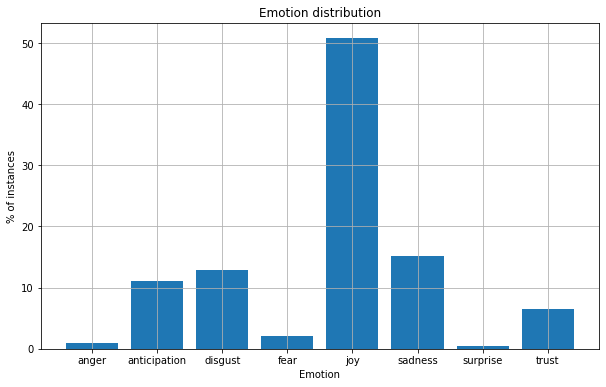

In [41]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = pred_result_df['emotion'].unique()
post_total = len(pred_result_df)
df1 = a
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(10,6))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---
# Bert
I only go through all the process in tutorial, but didn't know much of the detail. So the result of this bert model is not good qq

* First: clean the data

In [42]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
import keras
from tqdm import tqdm
import pickle
from keras.models import Model
import keras.backend as K
from sklearn.metrics import confusion_matrix,f1_score,classification_report
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
import itertools
from keras.models import load_model
from sklearn.utils import shuffle
#from transformers import *
from transformers import BertTokenizer, TFBertModel, BertConfig

def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')

def clean_stopwords_shortwords(w):
    stopwords_list=stopwords.words('english')
    words = w.split() 
    clean_words = [word for word in words if (word not in stopwords_list) and len(word) > 2]
    return " ".join(clean_words) 

def preprocess_sentence(w):
    w = unicode_to_ascii(w.lower().strip())
    w = re.sub(r"([?.!,¿])", r" ", w)
    w = re.sub(r'[" "]+', " ", w)
    w = re.sub(r"[^a-zA-Z?.!,¿]+", " ", w)
    w=clean_stopwords_shortwords(w)
    w=re.sub(r'@\w+', '',w)
    return w

In [43]:
jdf=jdf.dropna()                                                           
jdf['text']=jdf['text'].map(preprocess_sentence)
jdf

,hashtags,tweet_id,text
0,[Snapchat],0x376b20,people post add snapchat must dehydrated cuz man
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,brianklaas see trump dangerous freepress aroun...
2,[bibleverse],0x28b412,confident obedience write knowing even ask phi...
3,[],0x1cd5b0,issa stalking tasha
4,[],0x2de201,trust faith friend someone trust putting faith...
...,...,...,...
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,buy last tickets remaining show sell mixedfeel...
1867531,[],0x29d0cb,swear hard work gone pay one day
1867532,[],0x2a6a4f,parcel card left idea get parcel
1867533,[],0x24faed,corporate life date using relative anachronism...


In [44]:
result = pd.merge(jdf,identification_df)
result_emotion = pd.merge(result,emotion_df)

In [45]:
train_df = result_emotion
test_df = result.drop(result[result.identification == 'train'].index)
train_df = train_df.sample(n=1000,random_state=123,axis=0)

In [46]:
from transformers import BertTokenizer, TFBertForSequenceClassification
num_classes = 8
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=num_classes)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [47]:
train_df['gt'] = train_df['emotion'].map({'joy':0,'anticipation':1,'sadness':2,'trust':3,'disgust':4,'anger':5,'fear':6,'surprise':7})

In [48]:
train_df

,hashtags,tweet_id,text,identification,emotion,gt
26237,[thanks],0x20e232,feelings thanks followin flow twitter verse,train,joy,0
912542,[awesome],0x31373d,natsuko really awesome,train,joy,0
645006,[],0x35deae,thank god everything family,train,joy,0
615756,"[guiltytilproveninnocent, lawyerup]",0x354966,watching confession tapes netflix proves syste...,train,disgust,4
353046,[],0x245649,robertdumaine realdonaldtrump got call stupid ...,train,anticipation,1
...,...,...,...,...,...,...
639923,"[Living, Faith]",0x320c66,know word god living living word obediently fa...,train,anticipation,1
575725,[],0x1d9eb7,dawnmoorhouse thefizzcmjb cherylbaker come back,train,joy,0
219165,[failure],0x29f065,gop realdonaldtrump potus failure control sena...,train,sadness,2
448592,[],0x28bc72,assemble come draw near together escaped natio...,train,joy,0


In [49]:
sentences=train_df['text']
labels=train_df['gt']
len(sentences),len(labels)

(1000, 1000)

In [50]:
input_ids=[]
attention_masks=[]

for sent in sentences:
    bert_inp=bert_tokenizer.encode_plus(sent,add_special_tokens = True,max_length =64,pad_to_max_length = True,return_attention_mask = True)
    input_ids.append(bert_inp['input_ids'])
    attention_masks.append(bert_inp['attention_mask'])

input_ids=np.asarray(input_ids)
attention_masks=np.array(attention_masks)
labels=np.array(labels)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
C:\Users\ninjat\AppData\Roaming\Python\Python38\site-packages\transformers\tokenization_utils_base.py:2304: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [51]:
len(input_ids),len(attention_masks),len(labels)

(1000, 1000, 1000)

In [52]:
train_inp,val_inp,train_label,val_label,train_mask,val_mask=train_test_split(input_ids,labels,attention_masks,test_size=0.2)

In [53]:
sentences_test=test_df['text']

input_ids_test=[]
attention_masks_test=[]

for sent in sentences_test:
    bert_inp=bert_tokenizer.encode_plus(sent,add_special_tokens = True,max_length =64,pad_to_max_length = True,return_attention_mask = True)
    input_ids_test.append(bert_inp['input_ids'])
    attention_masks_test.append(bert_inp['attention_mask'])

input_ids_test=np.asarray(input_ids_test)
attention_masks_test=np.array(attention_masks_test)


In [54]:
print('\nBert Model',bert_model.summary())

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5,epsilon=1e-08)

bert_model.compile(loss=loss,optimizer=optimizer,metrics=[metric])

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  6152      
                                                                 
Total params: 109,488,392
Trainable params: 109,488,392
Non-trainable params: 0
_________________________________________________________________

Bert Model None


In [55]:
history=bert_model.fit([train_inp,train_mask],train_label,batch_size=128,epochs=1,validation_data=([val_inp,val_mask],val_label))

7/7 [==============================] - 138s 17s/step - loss: 2.0018 - accuracy: 0.2900 - val_loss: 1.9255 - val_accuracy: 0.3500


In [ ]:
preds = bert_model.predict([input_ids_test,attention_masks_test],batch_size=128)

In [ ]:
preds[:5]

In [ ]:
pred_labels = np.argmax(preds.logits, axis=1)

In [ ]:
b=pd.DataFrame(pred_labels, columns = ['label'])
b['emotion'] = b['label'].map({0:'joy',1:'anticipation',2:'sadness',3:'trust',4:'disgust',5:'anger',6:'fear',7:'surprise'})
b

Below are the result of bert model. It take 4hr to predict(I don't know why, maybe too many data) 

![Imgur](pic2.png)

![Imgur](pic1.png)

# Summary: 
* I tried some models like Naive Bayes, Decision Tree and the Neural Network from the lab 2. I also tried the Bert but because of the limit of time so I couldn't train complete(For whole data it takes 40hr for 1 epoch).
* For the preprocessing I tried some things I got from the labs and also some tutorials from the web. Tried some combinations of nltk tokenizer, bag of words, max_features and cleaning data and adjust the number of setting.
* In the end, my final best score of accuracy was 0.47504, which is totally far from my goal(0.6). I think it is my fault that I didn't do more research of how to impove more of my model. but I enjoyed a lot this homework. It makes me learn more knowledge of data mining skill. Thanks a lot for teacher & TA.